In [133]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [134]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [135]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [136]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [137]:
# reflect an existing database into a new model
ClimateInfo = automap_base()


# reflect the tables
ClimateInfo.prepare(engine, reflect=True)

In [138]:
# View all of the classes that automap found
ClimateInfo.classes.keys()

['measurement', 'station']

In [139]:
# Save references to each table
Measurement = ClimateInfo.classes.measurement
Station = ClimateInfo.classes.station

In [140]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [141]:
# Find the most recent date in the data set.
rd = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
#session.query(func.max(Measurement.date)).all()[0][0]

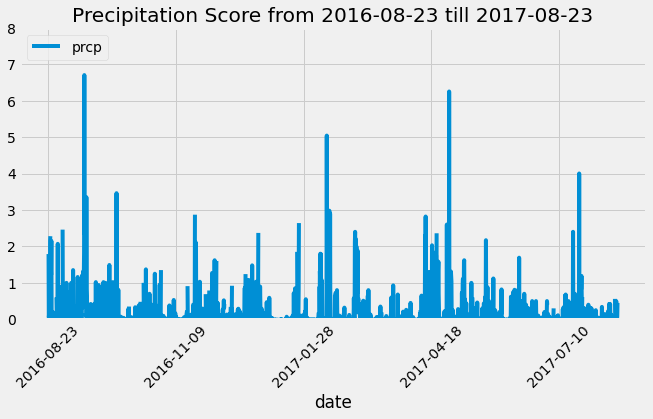

In [142]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
currdt = dt.date.today()
rd_dateformat = currdt.replace(year=int(rd[:4]),month=int(rd[5:7]),day=int(rd[8:]))
eoy = rd_dateformat - dt.timedelta(days=365)    
sd = eoy.strftime("%Y-%m-%d")
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores

precipinfo = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date <= rd).filter(Measurement.date >= sd).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
pDF = pd.DataFrame(precipinfo)
pDF.set_index("date",inplace=True)
pDF.head()

# Sort the dataframe by date
pDF = pDF.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
pDF.plot(figsize=(10,5),ylim=(0,8),title=f'Precipitation Score from {sd} till {rd}',\
                  label="Precipitation",rot=45)
plt.legend(loc="upper left")
plt.savefig("Resources/1_Precipitation_Analysis.jpg")
plt.show()



In [149]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pDF.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [151]:
# Design a query to calculate the total number stations in the dataset
ts = session.query(Station).count()
print(f'Total Stations: {ts}')

Total Stations: 9


In [154]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
mas = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


for active_s in mas:
    print(f'{active_s[0]},{active_s[1]}')
    


USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [155]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

In [157]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

rslt = session.query(Measurement.date,Measurement.station,Measurement.tobs).filter(Measurement.date >= sd).filter(Measurement.date<=rd).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).all()

tmpobdf = pd.DataFrame(rslt,columns=["date","id","temp"])
tmpobdf.head()


,date,id,temp
0,2017-08-18,USC00519281,79.0
1,2017-08-17,USC00519281,76.0
2,2017-08-16,USC00519281,76.0
3,2017-08-15,USC00519281,77.0
4,2017-08-14,USC00519281,77.0


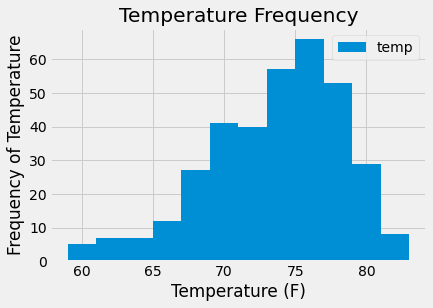

In [158]:
tmpobdf.plot.hist(by="temp",bins=12,label="Obs",title=f'Temperature Frequency')
plt.ylim=(0,80)
plt.ylabel("Frequency of Temperature")
plt.xlabel("Temperature (F)")
plt.legend=()
plt.savefig("Resources/2_Temperature_Analysis.jpg")
plt.show()

# Close session

In [148]:
# Close Session
session.close()